<a href="https://colab.research.google.com/github/cielo112/Customer_Clustering_and_Analysis/blob/main/Customer_Segmentation_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

The outcome of this project will provide businesses with a comprehensive understanding of their customer base, enabling them to make data-driven decisions, develop personalized marketing campaigns, and optimize resource allocation. By utlizing KMeans clustering for customer segmentation and clustering, we can unlock valuable insights that drive customer-centric strategies and ultimately lead to increased customer satisfaction and business growth.


**Metadata**

The column descriptions are available via the link attached:
[Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

#Table of Contents

1. [Initial Look](#initial_look)
2. [Initial Feature Engineering](#int_feat_eng)
3. [Exploratory Data Analysis](#eda)
4. [Data Preprocessing](#dp)
5. [Clustering](#c)
6. [Exploratory Data Analysis with the Clusters](#edac)
7. [Conclusion](#conc)

#Initial Look at the Dataset <a name="initial_look"></a>

In [ ]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/marketing_campaign.csv', sep = '\t' )

In [ ]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
rows, columns = df.shape
print('Number of Rows:', rows)
print('Number of Columns:', columns)

Number of Rows: 2240
Number of Columns: 29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


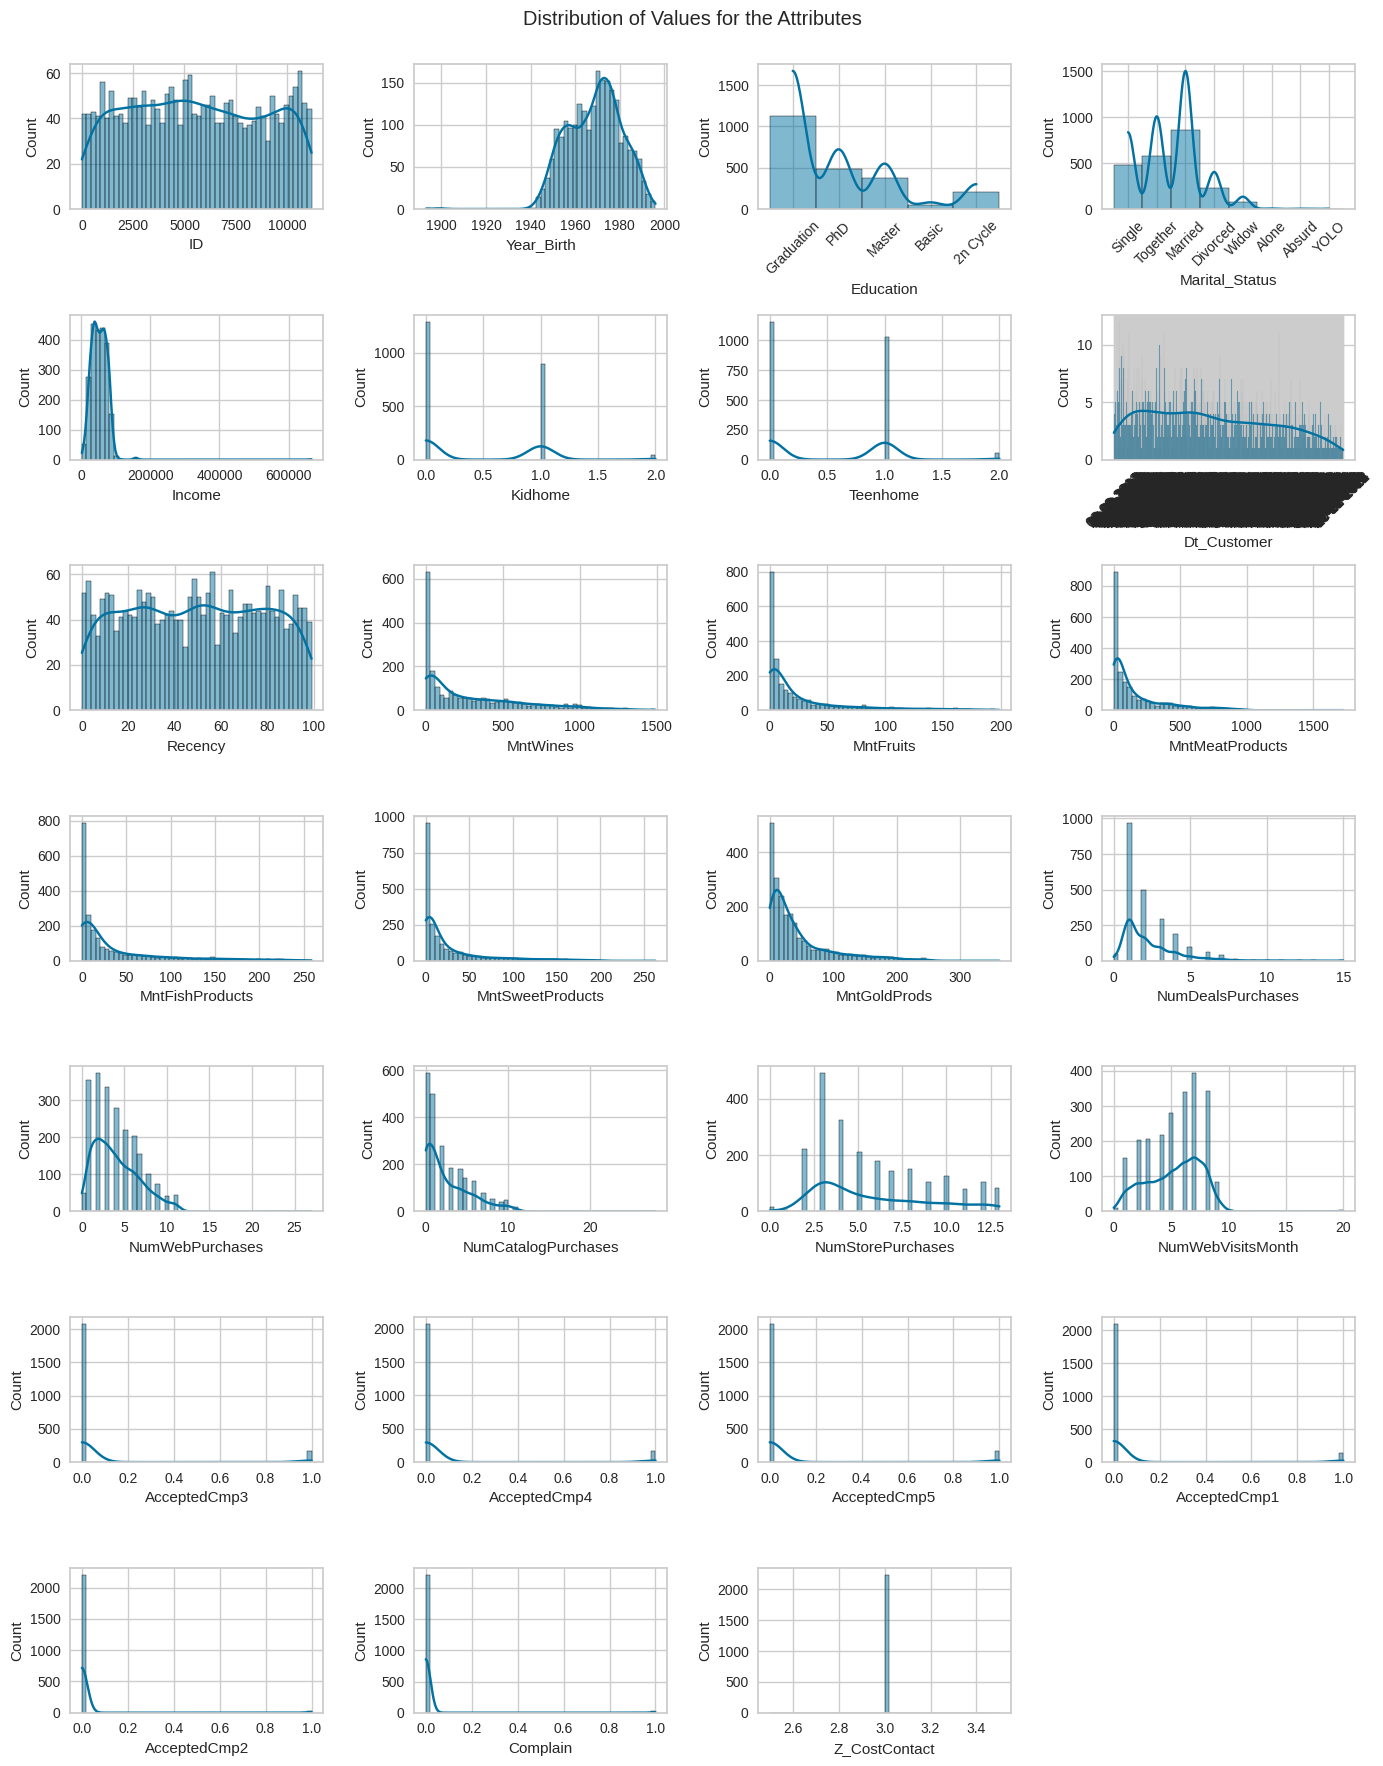

In [ ]:
fig, axs = plt.subplots(figsize=(14,18), nrows = 7, ncols=4)

for i, col in zip(range(1,28), df.columns):
  plt.subplot(7,4,i)
  sns.histplot(data=df, x=df[col], bins=50, kde=True)
  if df[col].dtype == 'O':
    plt.xticks(rotation=45)
  plt.xlabel(col)
fig.delaxes(axs[6][3])
plt.suptitle('Distribution of Values for the Attributes')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

**Initial Insights from the Dataset**

*   We have a total of 29 columns
* There are 2240 entries in the dataset
*   There are 24 missing data from the Income column but the rest of the columns are already clean.
* There is an outlier in the income column based on the sumary statistics provided by describe().
* There is a record for  customer born in 1893 based on the summary statistics.
* The dataset contains a mix of float, int, and object data types. Some of the int values are discrete as indicated by the histogram.
* The Dt_Customer column which is the date the customer joined the company is not in date-time format
* The marital status column contains extra categories such as yolo, absurd, alone, and together that can be merged with the other categories for simplification.
* The education column contains extra category such as 2n Cycle. Categories such as 'Graduation' and 'Basic' will have to be renamed for clarity.

# Initial Feature Engineering <a name="int_feat_eng"></a>

In the feature engineering section, we explore the crucial step of transforming raw data into meaningful features that can improve the performance of our machine learning models. Feature engineering involves selecting, creating, and transforming variables to capture relevant information and patterns from the data.

This section covers various techniques and strategies to engineer features effectively. We delve into methods such as:

1. Data Cleaning: This section will address missing data based on the number of missing values and the type of data that is missing.

2. Feature Transformation: Modifying the distribution or scale of features to meet the assumptions of the chosen machine learning algorithm. We explore techniques like normalization and standardization.

3. Feature Creation: Generating new features by combining existing ones or extracting additional information from the dataset.

4. Removing Outliers: Outliers in datasets can significantly alter the behaviour of several machine learning models and algorithms. They tend to skew the performance and might give us models that cannot generalize well to other datasets. Thus it is important to remove them before any machine learning is done.



###Data Cleaning

Let us first deal with the missing data. Since there is only a few of them compared to the datapoints then we can simply drop the row entries with missing values.

There are also columns in the dataset such as Z_CostContact and Z_revenue that were not descibed in the metadata. Since these columns contain unknown data, it would be best to drop them as well.

Lastly, identifier column ID needs to be removed as well since the individual customer can be identified through the index anyway so its function is now redundant. We also dont want the machine to associate the ID number to the customer behaviour.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis =1 , inplace= True)

###Feature Transformation and Addition

In this part, we are going to look at some columns and find a way to extract better information, organize the data, and transform it into something that might provide more meaningful insights to us.

**Dt_Customers**

Let us start by transforming the Dt_Customer column into date-time format

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],
  infer_datetime_format=True, dayfirst=True)

The Dt_Customer column is just the date the customer joined the company, a more easily manageable information though is the number of days that the customer has been with the company. Thus we are going to further transform this column to get that information.

To do this, we are going to compare each date with the latest date recored in the dataset instead of comparing it to the present date. This will ensure that the info we have in the dataset will not be dependent on the date at which this code is run.

In [ ]:
#Get the latest date
latest_date = df['Dt_Customer'].max()

df['DaysAsCustomer'] = latest_date - df['Dt_Customer']
df['DaysAsCustomer'] = df['DaysAsCustomer'].dt.days
df.drop('Dt_Customer', axis= 1, inplace=True)

**Year_Birth**

This column indicates the year at which the customer was born. While this data is okay on its own, to facilitate better analysis we are going to extract the age of the customer from this instead. We are also going to remove outlier data from this column such as people who are too old/ too young.

In [ ]:
from datetime import date

#drop the rows containing persons who are too old/too young
df.drop(df[df['Year_Birth'] < 1933].index, axis = 0, inplace=True )

#get the current year
current_year = date.today().year

df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis = 1, inplace = True)



**Total Money Spent**

The dataset contains information regarding the specific purchases made by a person. From this we can add another feature which indicates the total amount of money spent by them.

In [ ]:
df['Total_Spent'] = df['MntWines']
df['Total_Spent'] += df['MntFruits']
df['Total_Spent'] += df['MntMeatProducts']
df['Total_Spent'] += df['MntFishProducts']
df['Total_Spent'] += df['MntSweetProducts']
df['Total_Spent'] += df['MntGoldProds']

Let us observe the basic summary statistics now that we have transformed and replaced some of the columns in the dataset

**Renaming and Fixing Column Values**

This subsection will focus on changing the values obtained from specific columns that might be problematic or might cause confusion.

For this analysis, we are going to simplify the categories recored in the Marital_Status column, as well as rename some categories in the Education column.

In [ ]:
df['Living_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner', 'Together': 'Partner',
    'Absurd': 'Alone', 'Single': 'Alone',
    'Widow': 'Alone', 'YOLO':'Alone',
    'Divorced': 'Alone', 'Single': 'Alone'
})

In [ ]:
df['Education'] = df['Education'].replace({
    'Graduation': 'College', '2n Cycle': 'Master'
})

In [ ]:
df.drop('Marital_Status', axis=1, inplace=True)

**Household Size**

The dataset contains information about the number of children and number of teens in the customer's home. A more informative data would be the household size so we are going to combine these info together with the Living status column to create a new column in the dataset.

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df['Household_Size'] = df['Kidhome'] + df['Teenhome'] + df['Living_Status'].replace({'Alone':1, 'Partner': 2})

df.drop(['Kidhome', 'Teenhome'], axis =1, inplace = True)

###Removing Outliers

In this subsection, we will be identifying possible outliers in the dataset and the remove them. This has to be done in order insure that we get an accurate performance as outliers tend to skew the results.

For this, we are mainly going to focus on the following columns:

*   Income
*   Total_Spent

These two columns were chosen based on the summary statistics obtained from the previous section.


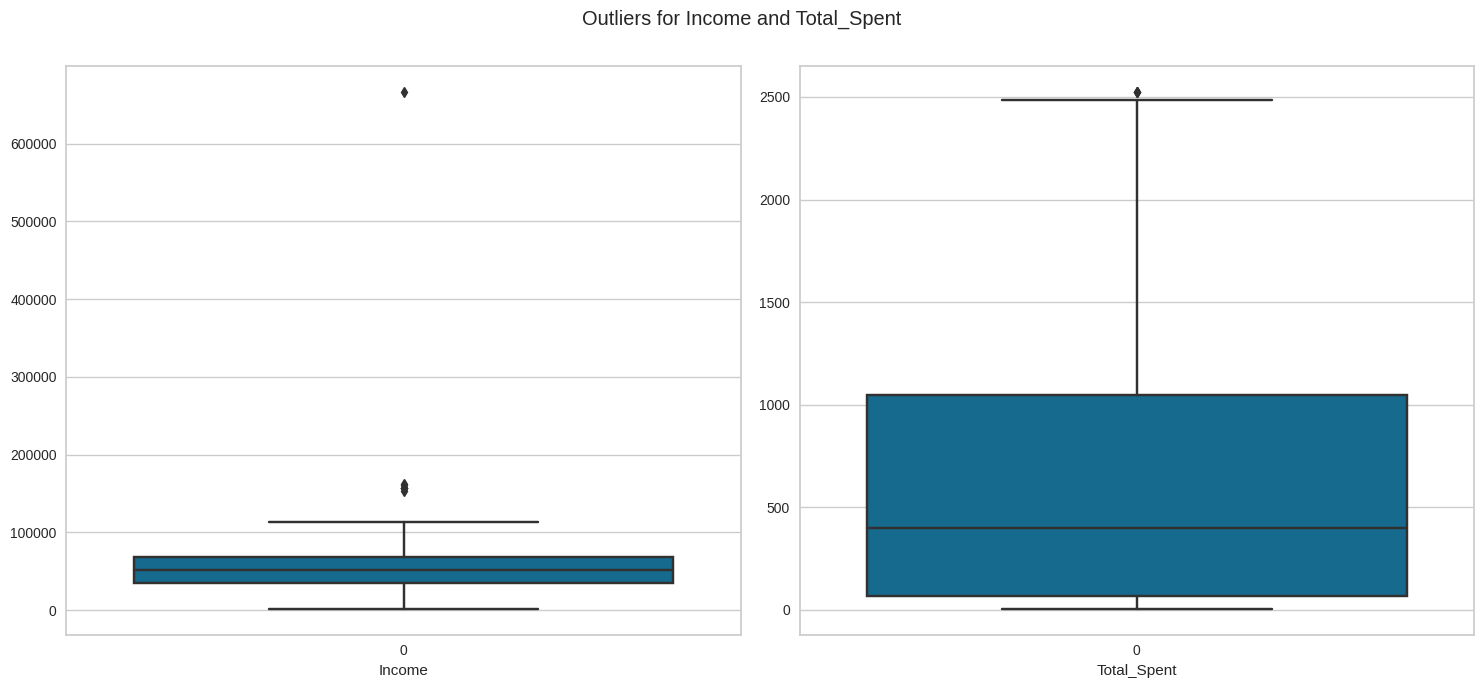

In [ ]:
#Create a boxplot

fig, axs = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
for i, col in zip(range(1,3), ['Income', 'Total_Spent']):
  plt.subplot(1,2,i)
  sns.boxplot(df[col])
  plt.xlabel(col)
plt.suptitle('Outliers for Income and Total_Spent')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()


As can be seen from the boxplots above, we have minimal outliers for both but their magnitude is signigicantly higher than the rest of the data population so it is best to remove them. In order to do this we are going to create a function that removes outliers based on the Inter Quartile Range.

In [ ]:
def outlier_remover(df, col):
  #this function removes outliers based from the IQR

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  filt = (df[col] > lower) & (df[col] < upper)
  df = df[filt]

  return df

In [ ]:
df = outlier_remover(df, 'Income')
df = outlier_remover(df, 'Total_Spent')

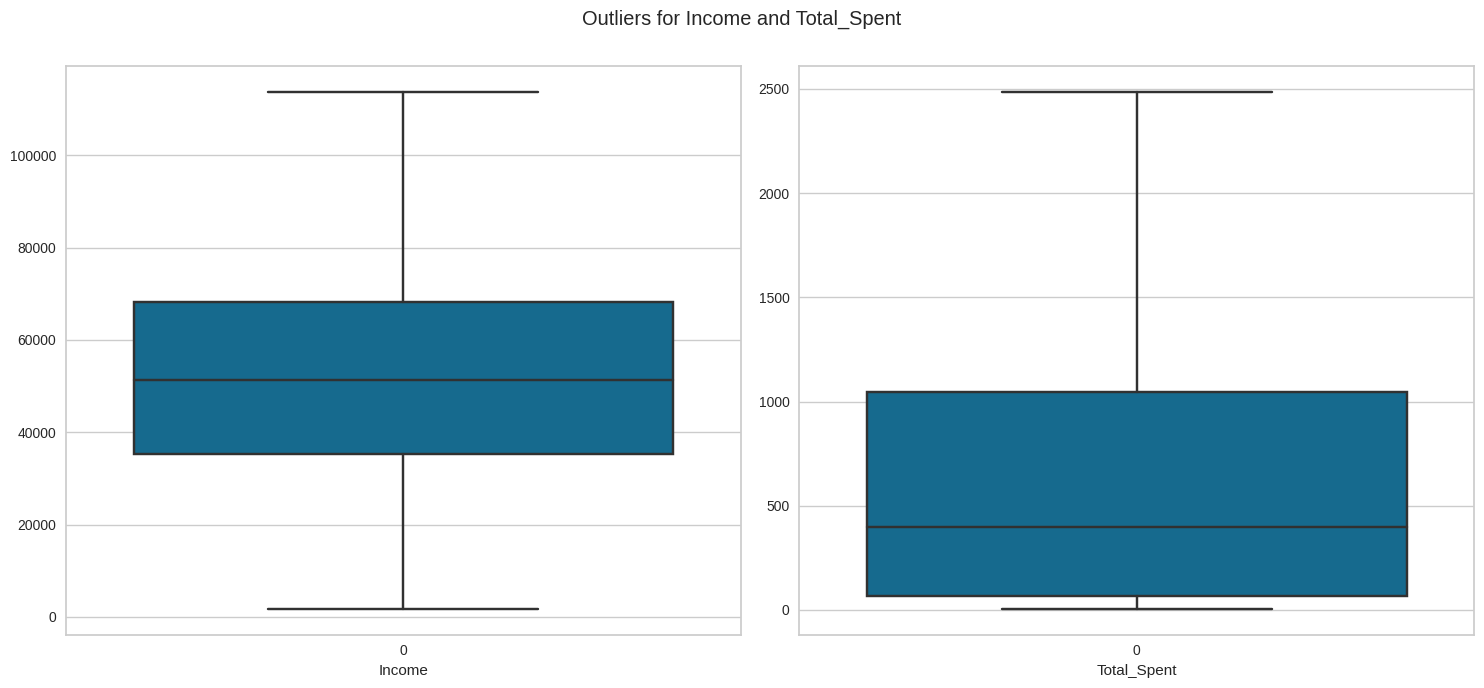

In [ ]:
#Check if the outliers have already been removed

fig, axs = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)
for i, col in zip(range(1,3), ['Income', 'Total_Spent']):
  plt.subplot(1,2,i)
  sns.boxplot(df[col])
  plt.xlabel(col)
plt.suptitle('Outliers for Income and Total_Spent')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

To conclude this feature engineering section, let us look at the summary statistics again and observe the changes that were made.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2202.0,51570.283379,20679.438848,1730.0,35182.50,51258.5,68146.50,113734.0
Recency,2202.0,49.021344,28.944211,0.0,24.00,49.0,74.00,99.0
MntWines,2202.0,304.960036,336.135586,0.0,24.00,176.5,505.00,1493.0
MntFruits,2202.0,26.252044,39.589747,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2202.0,164.336058,216.312982,0.0,16.00,68.0,230.75,1725.0
MntFishProducts,2202.0,37.678474,54.821185,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2202.0,26.967302,40.926101,0.0,1.00,8.0,33.00,262.0
MntGoldProds,2202.0,44.014986,51.747221,0.0,9.00,25.0,56.00,321.0
NumDealsPurchases,2202.0,2.320163,1.886763,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2202.0,4.100363,2.738390,0.0,2.00,4.0,6.00,27.0


#Exploratory Data Analysis <a name='eda'></a>

This section focus on exploring the relationships between the different features in the dataset as well as analyzing the general behaviour of the popultion sampled.

Here are some questions we wish to answer as we go through the dataset:

*   What is the ratio between the amount of money people earn and the amount they spend?
* How does the spending change as the size of household increases?
*   Which purchasing platform was used the most?
* How were the promotions received by the population?



**Amount of Money Spent vs Income**

We are going to start our analysis by creating a scatter plot of the income and total_spent columns in our dataset.

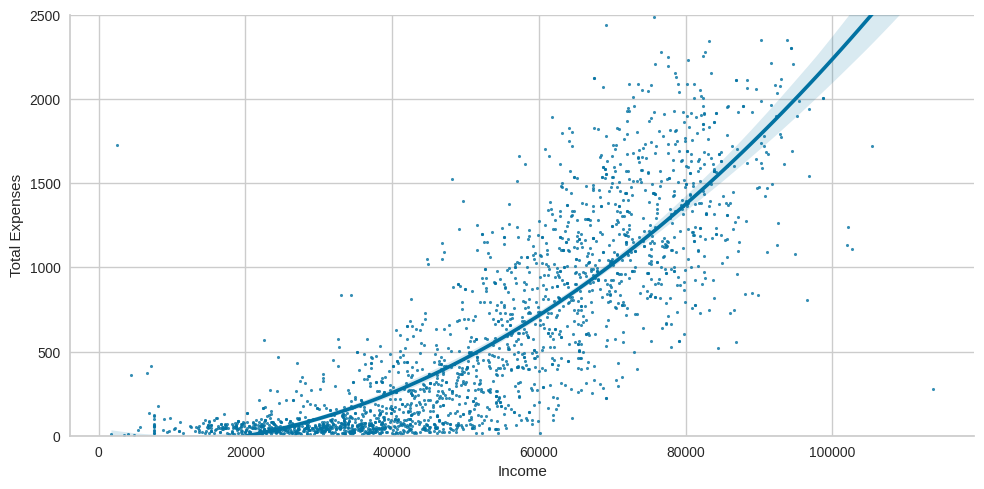

In [ ]:
sns.lmplot(data=df, x='Income', y='Total_Spent', scatter_kws={'s':5},
           order=2, height = 5, aspect =2)
plt.grid(True)
plt.xlabel('Income')
plt.ylabel('Total Expenses')
plt.ylim(0, 2500)
plt.show()

Insights from the graph:

* The total expense of the customers generally increases as their income increases. The relationship tends to show a quadratic behaviour.
* There seems to be a significant number of people earning between 20,000 to 40,000 who spends almost the same amount of money regardless of their income.

**Expense vs Household Size**

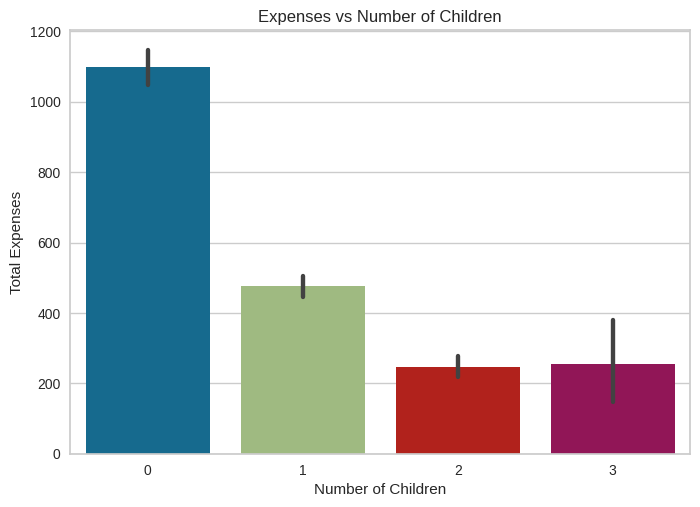

In [ ]:
sns.barplot(data=df, x = 'Children', y='Total_Spent')
plt.xlabel('Number of Children')
plt.ylabel('Total Expenses')
plt.title('Expenses vs Number of Children')
plt.show()

Insights from the graph:

* People with no children suprisingly spends the most on the items listed in the dataset.
* The expense goes down as well as the number of children increases.

**Place of Purchase**

In [ ]:
total_web = df['NumWebPurchases'].sum()
total_catalog = df['NumCatalogPurchases'].sum()
total_store = df['NumStorePurchases'].sum()

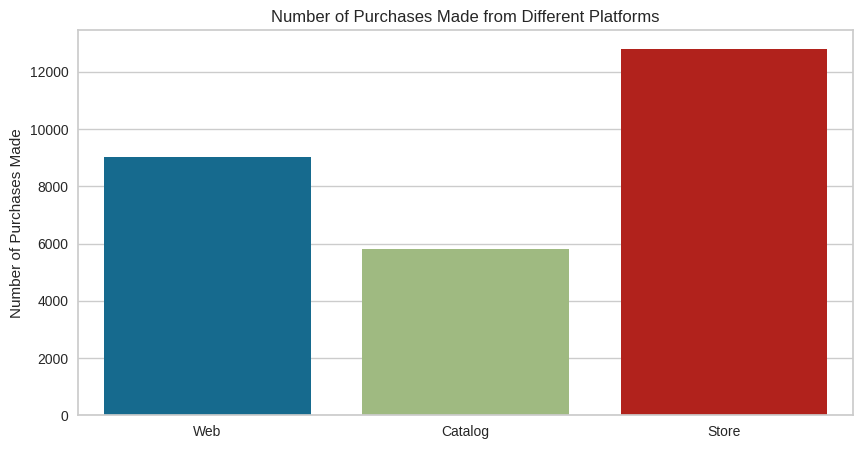

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
sns.barplot(x=['Web', 'Catalog', 'Store'], y=[total_web, total_catalog, total_store])
plt.title('Number of Purchases Made from Different Platforms')
plt.ylabel('Number of Purchases Made')
plt.show()

Insights from the graph:

* Store purchases is still the most preferred platform for transactions.
* Catalog purchases are significantly behind in the number of transactions. This could be because its market is now shared with the Web.

**Response to Promotion**

In [ ]:
camp1 = df['AcceptedCmp1'].sum()
camp2 = df['AcceptedCmp2'].sum()
camp3 = df['AcceptedCmp3'].sum()
camp4 = df['AcceptedCmp4'].sum()
camp5 = df['AcceptedCmp5'].sum()

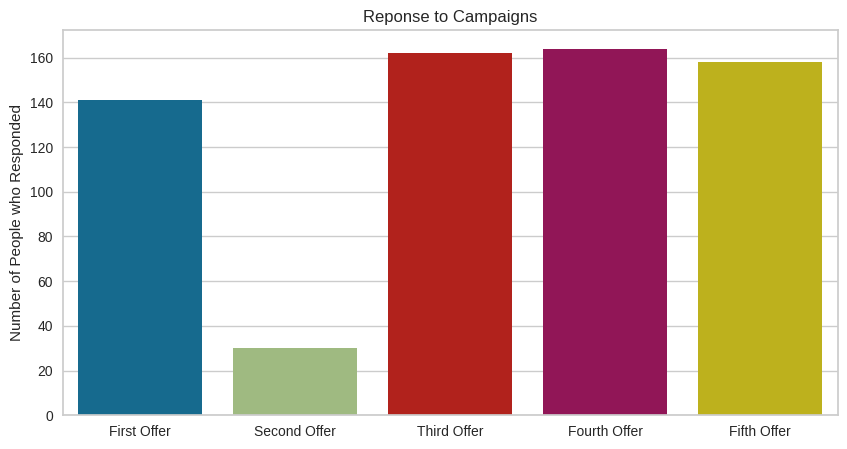

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
sns.barplot(x=['First Offer', 'Second Offer',
               'Third Offer', 'Fourth Offer', 'Fifth Offer'],
            y= [camp1, camp2, camp3, camp4, camp5])
plt.title('Reponse to Campaigns')
plt.ylabel('Number of People who Responded')
plt.show()

Insights from the graph:

* The graph shows that people are reluctant to accept offers if it was already offered the 2nd time. But it can be seen that they tend to accept the offer eventually when offered for the third time. This seems to suggest that persistent marketing is effective in making people respond to campaigns.

**Correlation Heatmap**

To summarize how the different features are related to each other, let us take a look at the correlation heatmap. This presents the correlation coefficients between pairs of variables in a tabular format, with color encoding to represent the magnitude of correlation. This visualization technique provides an intuitive way to identify both positive and negative correlations, as well as the strength of these relationships.

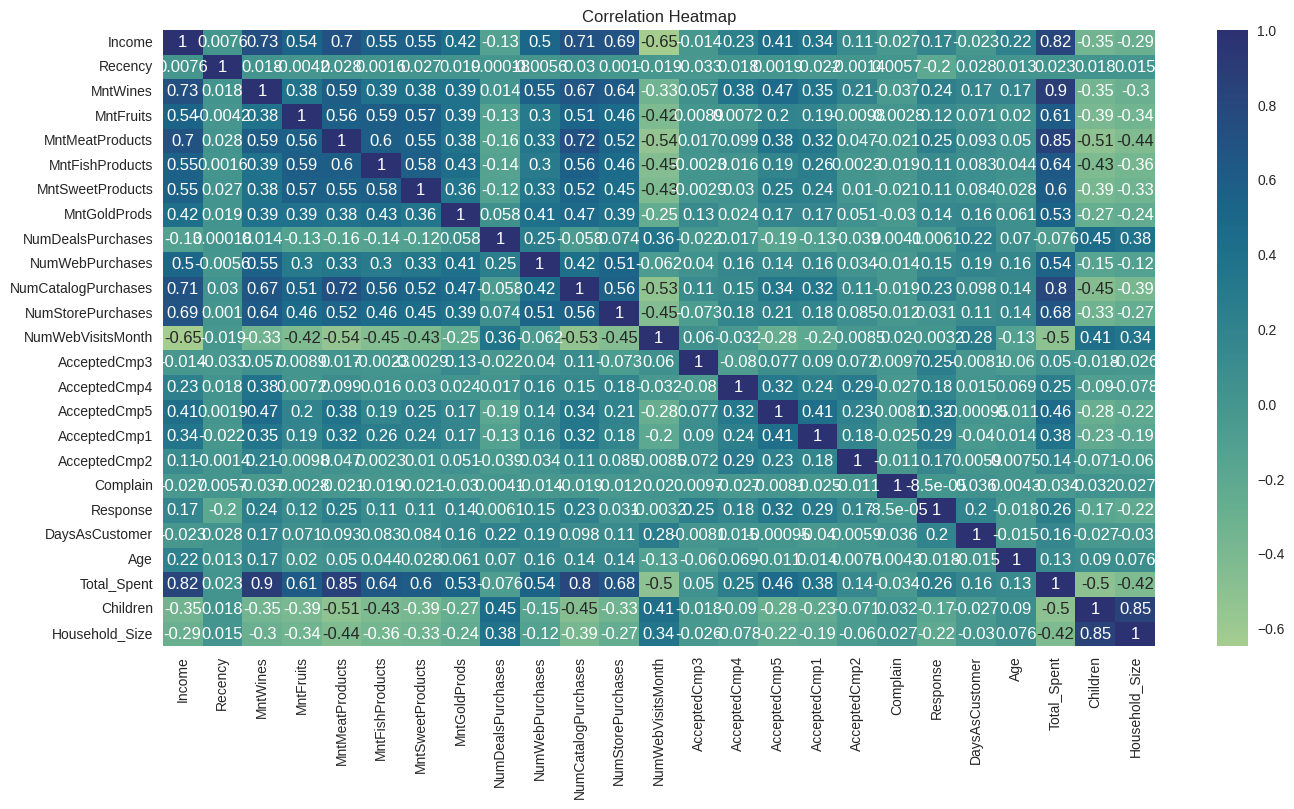

In [ ]:
fig, axs = plt.subplots(figsize=(16,8))
sns.heatmap(df.select_dtypes(['int64', 'float64']).corr(), annot=True, cmap= 'crest')
plt.title('Correlation Heatmap')
plt.show()

#Data Preprocessing <a name='dp'></a>

Before applying clustering algorithms in machine learning, it is essential to perform preprocessing steps to prepare the data for analysis. Preprocessing helps to enhance the quality of the data and improve the performance and accuracy of clustering algorithms. Here are some of the preprocessing steps we are going to employ in this dataset:

1. Encoding Categorical Variables: Clustering algorithms typically work with numerical data, so categorical variables need to be encoded. One-hot encoding or label encoding can be used depending on the nature of the categorical variables.


2. Feature Scaling: To ensure that all features contribute equally to the clustering process, it is important to scale the data. Common scaling techniques include standardization (mean = 0, standard deviation = 1) or normalization (scaling values between 0 and 1).

3. Feature Selection: If the dataset contains irrelevant or redundant features, they can negatively impact the clustering process. Feature selection techniques, such as variance thresholding, correlation analysis, or dimensionality reduction techniques like Principal Component Analysis (PCA), can be applied to identify and remove such features.

4. Dimensionality Reduction: In high-dimensional datasets, reducing the number of features can improve clustering performance and reduce computational complexity. Techniques like PCA or t-SNE (t-Distributed Stochastic Neighbor Embedding) can be employed to reduce the dimensionality of the data while preserving important information.

###Encoding Categorical Variables

In [ ]:
#select the categorical columns from the dataset

cat_cols = [col for col in df.select_dtypes('object').columns]
cat_cols

['Education', 'Living_Status']

Since the categorical data are ordinal as well, we are going to perform label encoding to assing numeric labels to it. This process helps machine learning algorithms process the data better.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
  df[col] = df[[col]].apply(le.fit_transform)


In [ ]:
#Check if all the features are now numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2202 non-null   int64  
 1   Income               2202 non-null   float64
 2   Recency              2202 non-null   int64  
 3   MntWines             2202 non-null   int64  
 4   MntFruits            2202 non-null   int64  
 5   MntMeatProducts      2202 non-null   int64  
 6   MntFishProducts      2202 non-null   int64  
 7   MntSweetProducts     2202 non-null   int64  
 8   MntGoldProds         2202 non-null   int64  
 9   NumDealsPurchases    2202 non-null   int64  
 10  NumWebPurchases      2202 non-null   int64  
 11  NumCatalogPurchases  2202 non-null   int64  
 12  NumStorePurchases    2202 non-null   int64  
 13  NumWebVisitsMonth    2202 non-null   int64  
 14  AcceptedCmp3         2202 non-null   int64  
 15  AcceptedCmp4         2202 non-null   i

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns =df.columns)
df_scaled.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,DaysAsCustomer,Age,Total_Spent,Living_Status,Children,Household_Size
0,-0.788526,0.317669,0.310276,0.982089,1.560050,1.764807,2.450732,1.491629,0.850191,0.360401,...,-0.26156,-0.117525,-0.095739,2.377513,1.525934,1.016304,1.694294,-1.348874,-1.268839,-1.762359
1,-0.788526,-0.252786,-0.380865,-0.874727,-0.637988,-0.732143,-0.650963,-0.634637,-0.734795,-0.169728,...,-0.26156,-0.117525,-0.095739,-0.420608,-1.189459,1.273043,-0.965610,-1.348874,1.402274,0.446986
2,-0.788526,0.969430,-0.795550,0.360174,0.574723,-0.172641,1.337771,-0.145840,-0.038948,-0.699856,...,-0.26156,-0.117525,-0.095739,-0.420608,-0.206981,0.331669,0.287389,0.741359,-1.268839,-0.657686
3,-0.788526,-1.205543,-0.795550,-0.874727,-0.562193,-0.667407,-0.505001,-0.585757,-0.754125,-0.169728,...,-0.26156,-0.117525,-0.095739,-0.420608,-1.061095,-1.294340,-0.922115,0.741359,0.066717,0.446986
4,1.593277,0.325166,1.554331,-0.392669,0.423134,-0.214257,0.151828,0.000799,-0.560834,1.420658,...,-0.26156,-0.117525,-0.095739,-0.420608,-0.952479,-1.037602,-0.304816,0.741359,0.066717,0.446986


###Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features from the given dataset in order to facilitate a more optmized classification. This is because the more features a classifier has to take into consideration the significantly more complex its task has to be.

The features to be removed are typically determined by looking for redundant features based on their correlation coefficients. For this project we will be employing the Principal Component Analysis methods in order to reduce the dimension of the dataset.

PCA identifies the underlying structure in high-dimensional data by transforming it into a lower-dimensional representation while preserving the essential information. The main goal of PCA is to find a set of new variables, known as principal components, which are linear combinations of the original variables. These principal components are selected in such a way that they capture the maximum amount of variation present in the data.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
df_reduced = pca.fit_transform(df_scaled)
df_reduced = pd.DataFrame(df_reduced, columns = ['col1', 'col2', 'col3'])

df_reduced.describe()

,col1,col2,col3
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,1.355259e-16,4.517529e-17,-6.776293e-17
std,2.817887e+00,1.495913e+00,1.383420e+00
min,-5.676359e+00,-3.513933e+00,-3.184501e+00
25%,-2.463715e+00,-1.058962e+00,-7.393713e-01
50%,-9.256340e-01,-1.453079e-01,-1.114848e-01
75%,2.276486e+00,8.958515e-01,4.742150e-01
max,8.120813e+00,6.101191e+00,8.926102e+00


We reduced the dimension of the datase using PCA. We can now visualize its projection into 3D space.

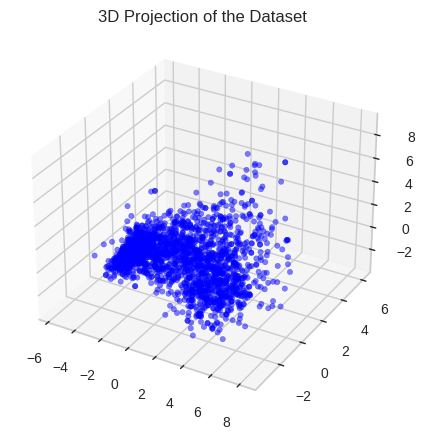

In [ ]:
from matplotlib.lines import MarkerStyle
x = df_reduced['col1']
y = df_reduced['col2']
z = df_reduced['col3']

fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, color = 'blue', alpha = 0.5, s= 15)
plt.title('3D Projection of the Dataset')
plt.show()

#Clustering <a name='c'></a>

Now that the dataset has been transformed and its dimensions reduced, we now perform clustering more efficiently and accurately. For this clustering process we will be using kMeans clustering.

Kmeans clustering which is a way to cluster datapoints based in their distance from a centriod, which is the center of the cluster. The final result of Kmeans clustering is a cluster where every datapoint now belongs to a cluster whose centroid it is closest too.

**Number of Clusters**

The number of clusters that can be formed from the dataset typically is now known at the start specially for high dimensional datasets. To determine the most optimized number of clusters we should have, we are going to implement the elbow method.

Simply put, the elbow method consists of measuring the distortion score of each datapoint for a given number of clusters. Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. This value changes as the number of cluster changes. What we will be after will be the number of cluster that will yield the lowet inertia without it being too high.

This method can be easily be done using the KElbowVisualizer which automatically computes for the distortion and plots a graph of it. The number of cluster to be chosen can be seen in the graph as the point where the vertical line passes through it.

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

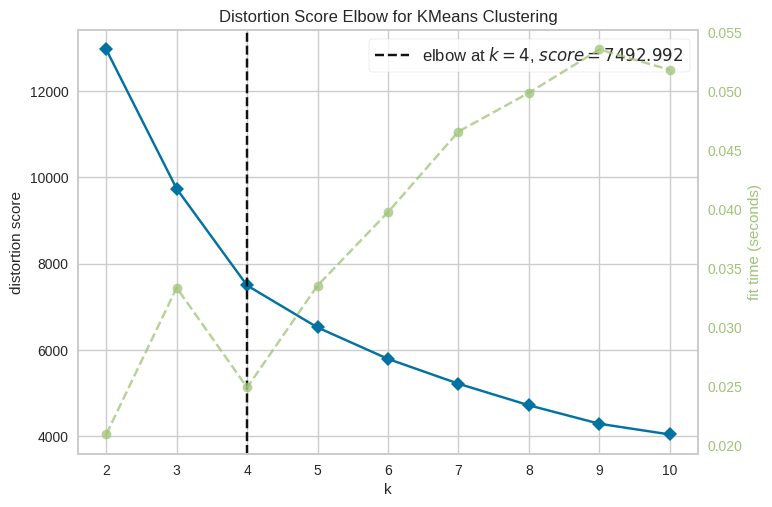

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_reduced)
elbow.show()

The graph shows that the best number of clusters that can use is 4.

**Implementing KMeans Clustering**

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(df_reduced)

In [ ]:
df_reduced['Clusters'] = y_pred

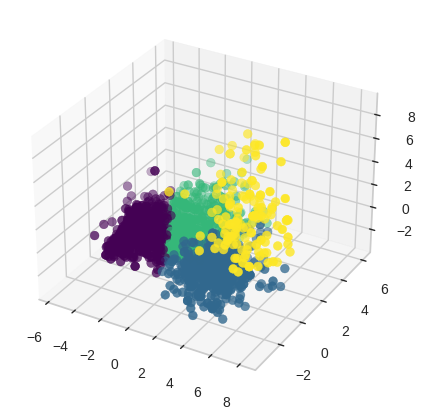

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
axs = plt.subplot(111, projection = '3d', label='bla')
axs.scatter(x ,y, z, s=40, c=df_reduced['Clusters'], cmap='viridis')
plt.show('Clusters in the 3D Projection')
plt.show()

# Exploratory Analysis with the Clusters <a name='edac'></a>


For this section, we will be performing another round of exploratory data anlysis but this time incorporating the clusters that we have made. This will allow us to gain further insights into what the instances in each cluster have in common.

Another important aspect that we will be learning from this section is the common behavior and/or preference of each cluster. This information is valuable as this would enable the business to have a more targeted and customer centric approach to their marketing and promotion.

Let us inspect further the other aspects of the clusters by asking the following questions:

* How does the expense and income vary across each cluster?
* What is the age distribution in each cluster?
* Which cluster has been with the company the longest time?
* What cluster buys the most of a specific product?
* Which cluster uses discounts the most?
* Which cluster reponds the most to campaigns and promotions?
* What are the preferred platforms for purchasing of each cluster?

We begin by creating a new column in our original dataset for the clusters that we have obtained.

In [ ]:
df['Cluster'] = y_pred
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,DaysAsCustomer,Age,Total_Spent,Living_Status,Children,Household_Size,Cluster
0,1,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,663,66,1617,0,0,1,1
1,1,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,113,69,27,0,2,3,0
2,1,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,312,58,776,1,0,2,1
3,1,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,139,39,53,1,1,3,0
4,3,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,161,42,422,1,1,3,2


Next, let us visualize how the clusters aer distributed in our dataset. This is important since our analysis should consider the posibility of uneven distributions.

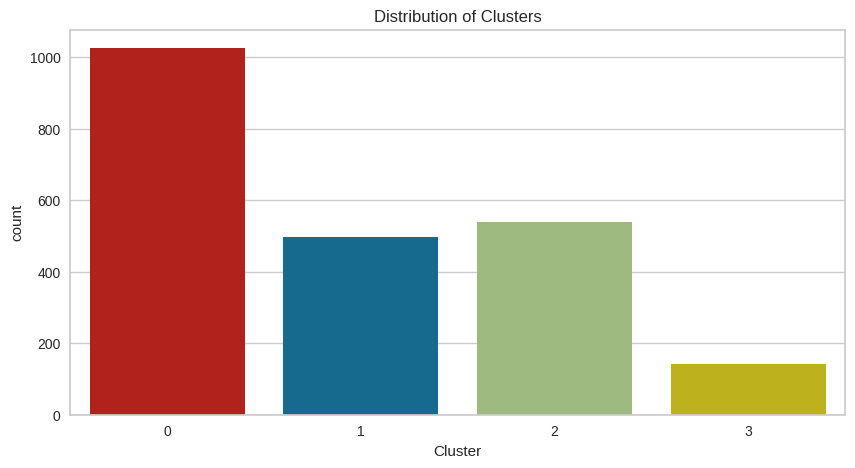

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x='Cluster', palette=['r', 'b','g', 'y'])
plt.title('Distribution of Clusters')
plt.show()

It appears that our dataset is predominantly belonging to cluster 0 with cluster 3 having the least number of instances belonging to it.

**Age Distribution**

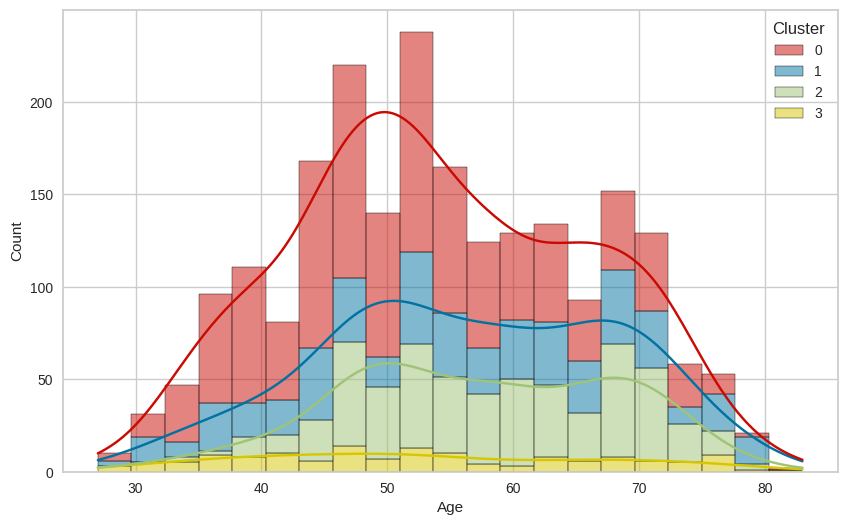

In [ ]:
fig, axs = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Cluster', palette=['r', 'b','g', 'y']
             , kde= True, multiple='stack')
plt.show()

Despite the difference in the number of people belonging in each cluster, the distribution of age across them seems to be the same. Most people in each cluster are around the age of 50.

**Days as Customer**

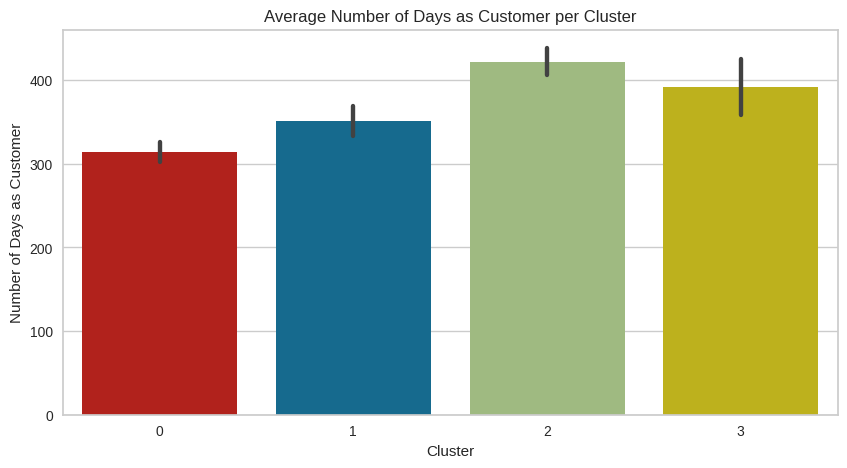

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='Cluster', y='DaysAsCustomer',  palette=['r', 'b','g', 'y'])
plt.ylabel('Number of Days as Customer')
plt.title('Average Number of Days as Customer per Cluster')
plt.show()

As indicated in the barplot above, cluster 2 has been with the company the longest time with cluster 0 being on average the most recent.

**Expense and Income for Different Clusters**

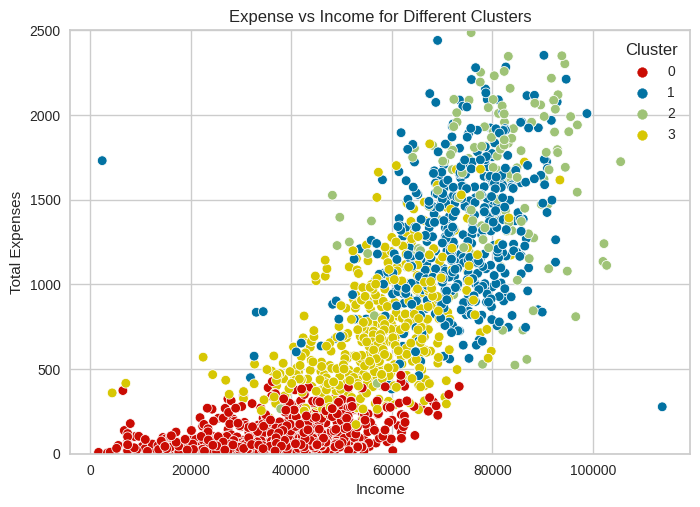

In [ ]:
sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='Cluster', palette=['r', 'b','g', 'y'])
plt.grid(True)
plt.xlabel('Income')
plt.ylabel('Total Expenses')
plt.ylim(0, 2500)
plt.title('Expense vs Income for Different Clusters')
plt.show()

Inights from the clustered graphs

* Cluster 0 are low spenders with low income
* Cluster 1 are high spenders with above average income
* Cluster 2 are high spenders with high income
* Cluster 3 are low spenders with below average income

**Household Size**

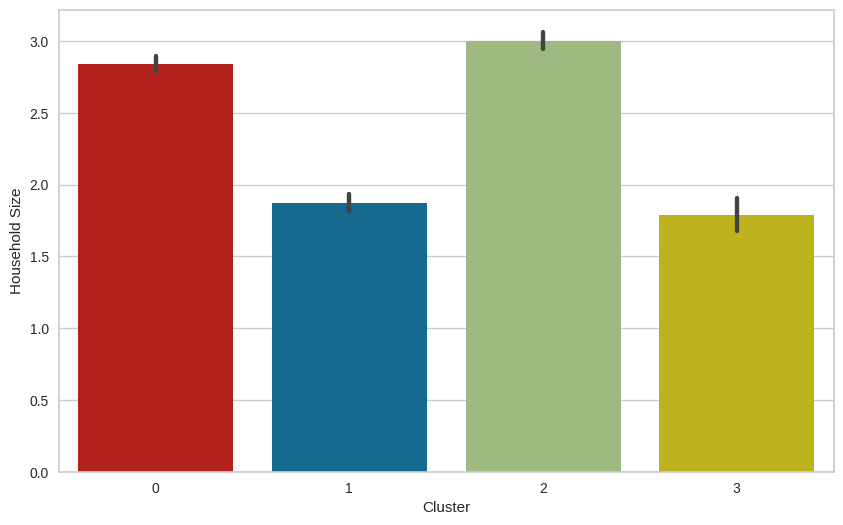

In [ ]:
fig, axs = plt.subplots(figsize=(10,6))
sns.barplot(data=df, x='Cluster', y='Household_Size',  palette=['r', 'b','g', 'y'])
plt.ylabel('Household Size')
plt.show('Average Household Size for every Cluster')
plt.show()

On average the largest household has 3 people in it while the least is just a bit below 2. Cluster 0 and cluster 2 have approximately the same household size which is interesting because are the opposite ends of the income groups.

Cluster 1 and 3, on the other hand, has on average lessn than 2 people in their household. This suggest that a portion of these clusters are single people who are living alone.

**Products Purchased**

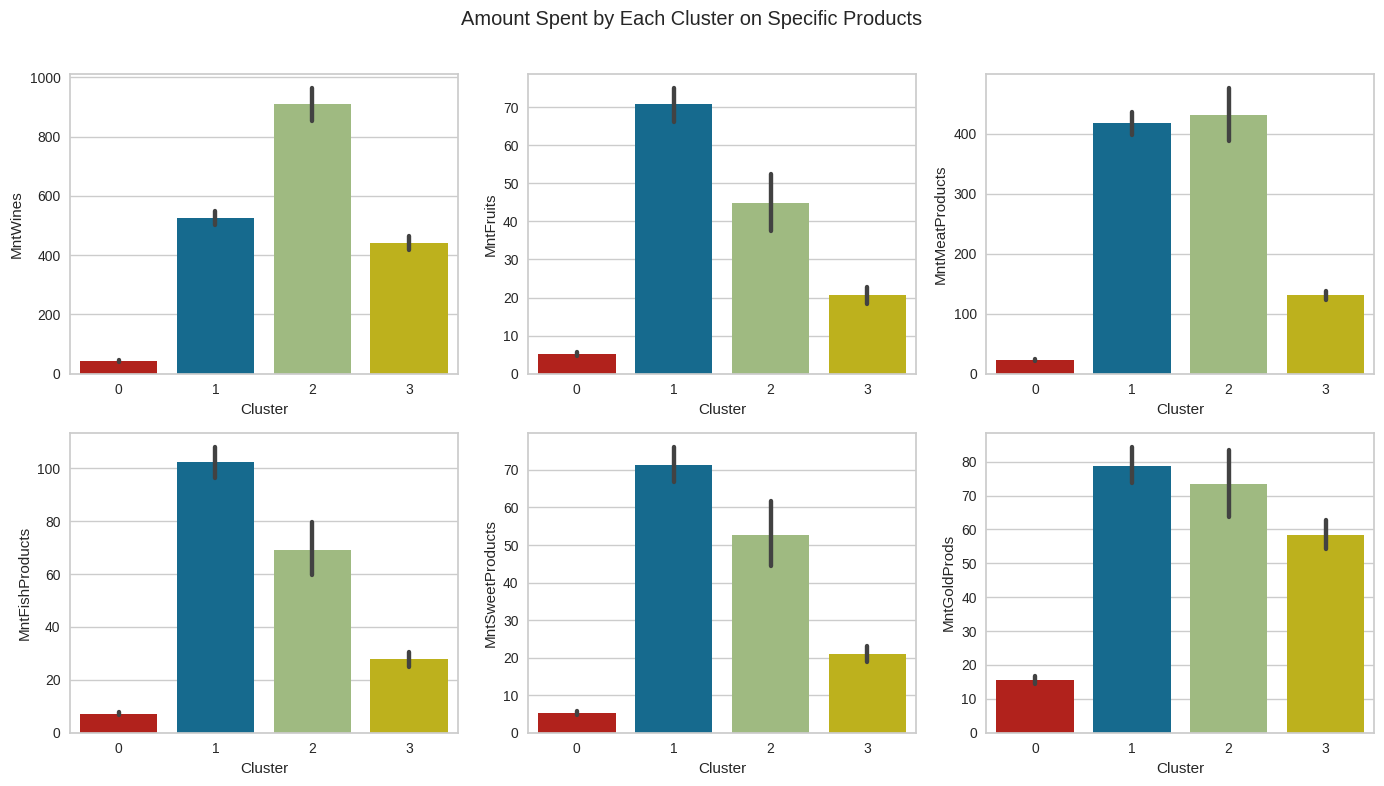

In [ ]:
prods = ['MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axs = plt.subplots(figsize=(14, 8), nrows= 2, ncols=3)
for i, prod in zip(range(1,7), prods):
  plt.subplot(2,3,i)
  sns.barplot(data=df, x=df['Cluster'], y=df[prod], palette=['r', 'b','g', 'y'])
plt.suptitle('Amount Spent by Each Cluster on Specific Products')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

Insights from the graphs:

* It can be seen from the graphs that belong to cluster zero consistently spend
less on all the products listed in the dataset. This aligns with our earlier analysis that cluster zero corresponds to low income and low spender customers.

* Cluster 3 unsurprisingly sits at the middle of the pack with average spending on all items. This cluster has already been tagged as people with average income and expenses.

* Cluster 1 and cluster 2 trades the top 1 and top 2 spot between them across different products. Cluster 2 spends the most with wines with cluster 1 spending just about half as much. Cluster 1 on the other hand spends the most on fuits, fish products, sweets, as well as gold.

* Cluster 1 and 2 spends roughly the same amount on meat products.

**Use of Discounts**

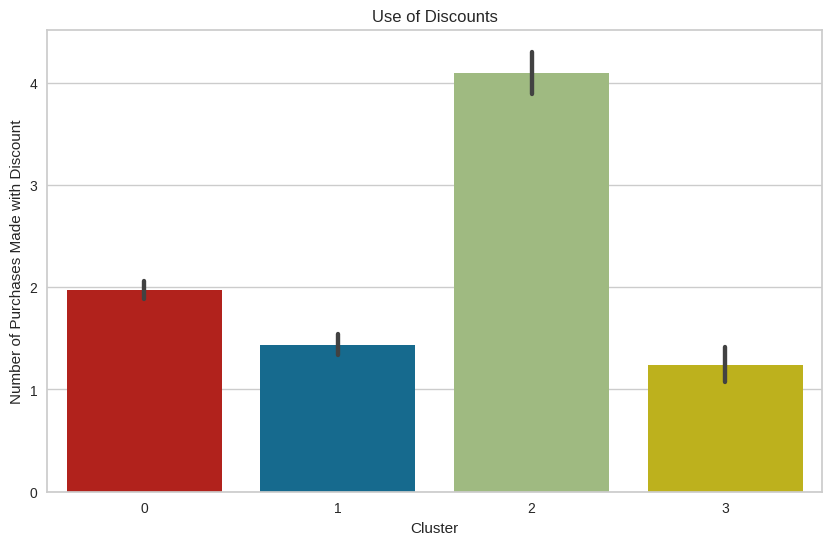

In [ ]:
fig, axs = plt.subplots(figsize=(10,6))
sns.barplot(data=df, x = 'Cluster', y='NumDealsPurchases',  palette=['r', 'b','g', 'y'])
plt.ylabel('Number of Purchases Made with Discount')
plt.title('Use of Discounts')
plt.show()

Insights from the graph:

* The cluster that uses the discounts the most is cluster 2. On average they make 4 purchases with the discount given. It is interesting to point that cluster 2 are the high income and high spender cluster. The number of discounts used by this cluster could be because of number of purchases they make.

* Cluster 0 utilizes discounts second to cluster 1. On average they make 2 purchases utilizing the discount which is half of that of cluster 2.

* Cluster 3 makes use of the discounts the least. These cluster are the average income and average spender group so this low usage of discount could be that they see no need to use the discount and/or they purchase less number of items.

**Response to Promotion**



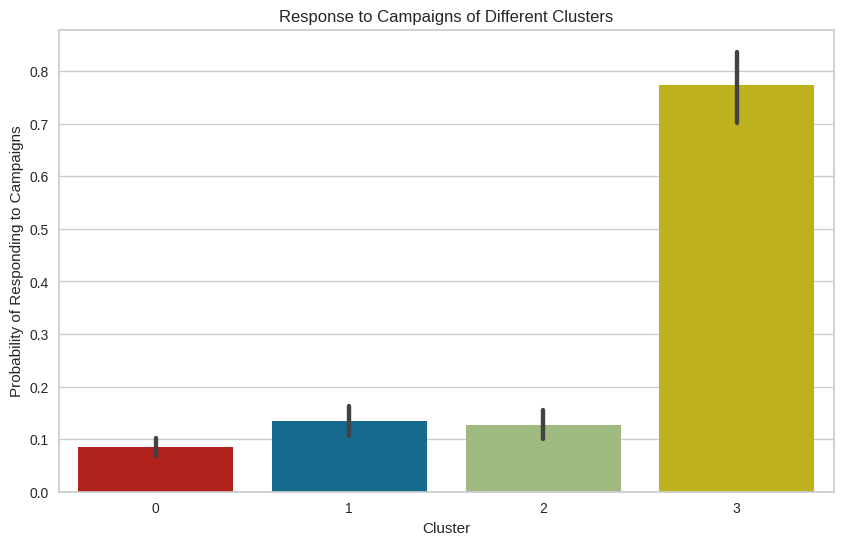

In [ ]:
fig, axs = plt.subplots(figsize=(10,6))
sns.barplot(data=df, x='Cluster', y='Response', palette=['r', 'b','g', 'y'])
plt.ylabel('Probability of Responding to Campaigns')
plt.title('Response to Campaigns of Different Clusters')
plt.show()

Insights from the graph:

* The cluster that reponds the most to the campaigns are people who belong to cluster 3. Cluster 3 also uses the discounts the less which indicates that while they respond to campaigns they tend not to use the discounts given.

* The cluster that responds the least to the campaigns is cluster 0. This cluster is 2nd in the use of discount so responding the least to campaigns might indicate that they only respond to promotions that they would actually use.

**Preferred Platform for Transactions**

In [ ]:
#dictionary for the number of purchases made and the platform that was used for the transaction

platforms = {
    'NumWebPurchases' : 'Web', 'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store',
}

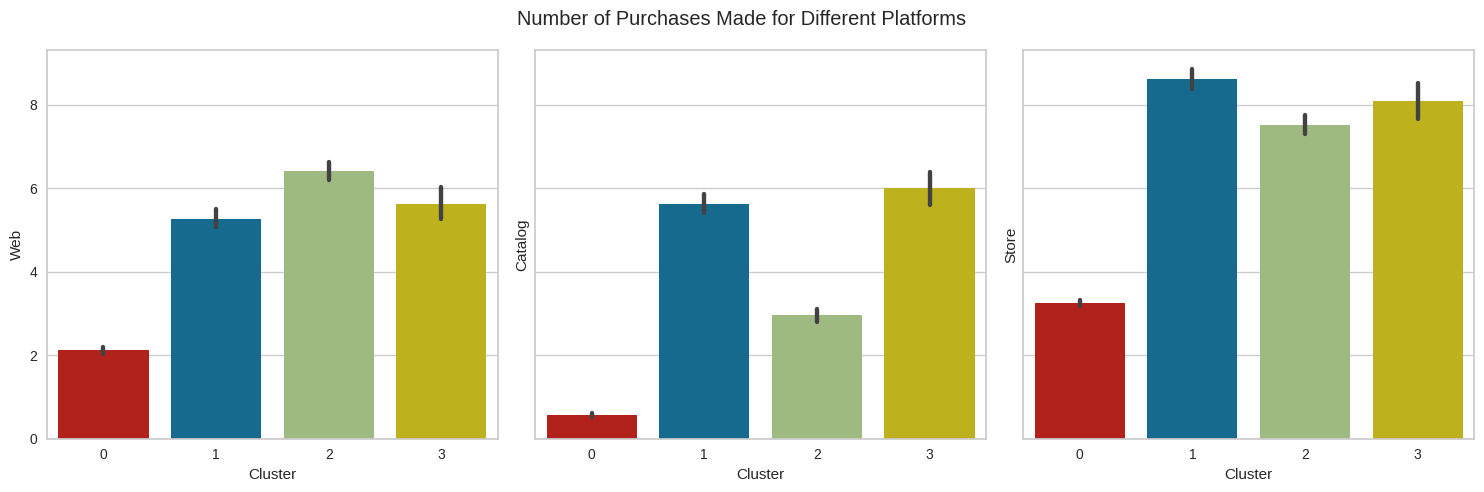

In [ ]:
fig, axs = plt.subplots(figsize = (15,5), nrows=1, ncols=3, sharey=True)
for i, platform in zip(range(1,4), platforms):
  plt.subplot(1,3,i)
  sns.barplot(
      data=df, x='Cluster', y= df[platform],
      palette=['r', 'b','g', 'y']
  )
  plt.ylabel(platforms[platform])
plt.suptitle('Number of Purchases Made for Different Platforms')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

Insights from the graph:

* Different platforms are preferred by different clusters for their transactions. The web is used the most by cluster 2, catalogs by cluster 3, and store by cluster 1.

* Clusters also have different disinclination to specific platforms. Cluster 0 uses purchases through catalogs the least; for cluster 1 it is the web; for cluster 2 it is the catalogs as well; and for cluster 3 it is the web.

* It can be seen tho that despite the difference in preference all the clusters still transacts the most with a physical store.

#Conclusion <a name='conc'></a>

The clusters obtained from this project gave us a lot of insights that can be used for a more personalized and customer-centric marketing approach. By applying feature engineering, data cleaning, data preprocessing, and clustering we were able to obtain meaningful patterns in customer behaviour and preference.

Through this project, we have gained a deeper understanding of the clients, enabling us to tailor marketing strategies and offerings to specific segments. This targeted approach allows the company to deliver personalized experiences and targeted promotions, ultimately enhancing customer satisfaction and loyalty.

It is important to highlight that the clusters made here are dynamic and must be routinely evaluated as customer preferrence also changes from time to time.

